In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

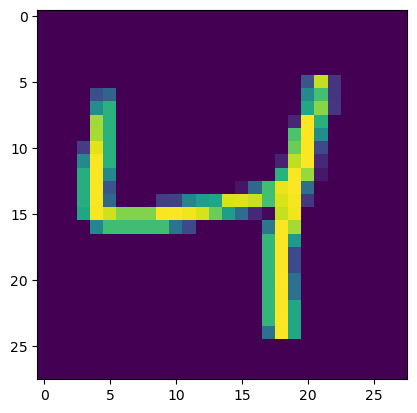

In [4]:
plt.imshow(X_train[2])

In [5]:
print(y_train)

[5 0 4 ... 5 6 8]


In [6]:
zeros_only = X_train[y_train==0]

In [7]:
zeros_only.shape

(5923, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation = 'relu'))
discriminator.add(Dense(1, activation = 'sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [14]:
codings_size = 100
generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape = [codings_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

In [15]:
GAN = Sequential([generator, discriminator])

In [16]:
discriminator.trainable = False

In [17]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [18]:
batch_size = 32

In [23]:
my_data = zeros_only

In [26]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [28]:
dataset = dataset.batch(batch_size, drop_remainder = True)

In [29]:
epochs = 1

In [30]:
GAN.layers

In [31]:
GAN.layers[0].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 150)               15150     
                                                                 
 dense_9 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143634 (561.07 KB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [36]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    
    for X_batch in dataset:
        i = i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
            
        #Training Discriminator 
        noise = tf.random.normal(shape = [batch_size, codings_size])
        # we craete fake images by inserting random noise
        gen_images = generator(noise)
        #after generating fake images, we concatenate them with real images which we have from X_batch
        #X_batch is the set of original images which we get from the dataset (for loop)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0) 
        # this concatenates batch_size number of 0s with batc_size no of 1s. if batch_size = 10, then 10 0s.
        # 0s are labelled with fake images and 1s are labelled with real images
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)    
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #Training Generator
        noise = tf.random.normal(shape = [batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

Currently on Epoch 1

	Currently on batch number 100 of 185


In [37]:
noise = tf.random.normal(shape = [10, codings_size])

In [38]:
noise.shape

TensorShape([10, 100])

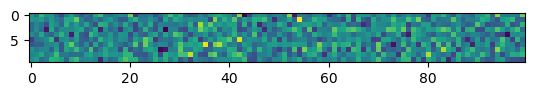

In [39]:
plt.imshow(noise)

In [40]:
images = generator(noise)

In [41]:
images.shape

TensorShape([10, 28, 28])

In [42]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

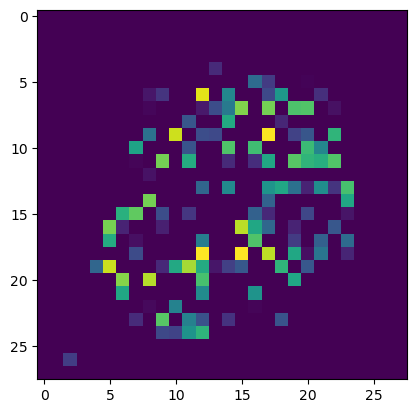

In [43]:
plt.imshow(images[0])

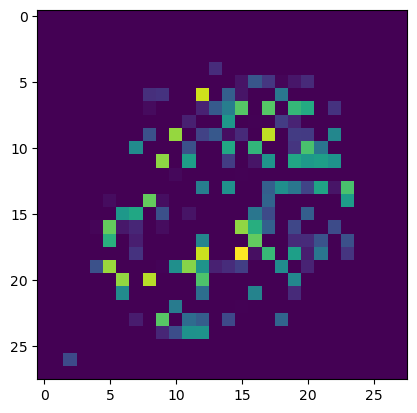

In [44]:
plt.imshow(images[1])

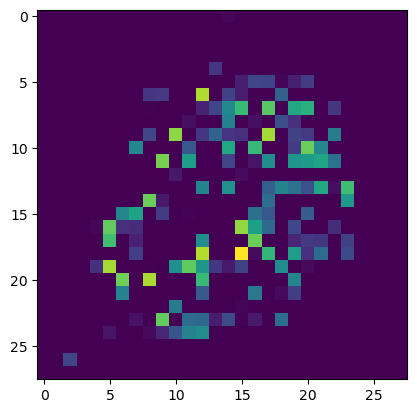

In [45]:
plt.imshow(images[2])

In [ ]:
#this issue is known as mode collapse where only 1 fake image is generated. research - this can be corrected using cost functions, replay buffers etc
#can be corrected using convolution GANs.